In [55]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import pandas as pd
import os
os.listdir("./data/shapefiles/turkeyborder/")

['TUR_adm1.cpg',
 'TUR_adm1.csv',
 'TUR_adm1.dbf',
 'TUR_adm1.prj',
 'TUR_adm1.shp',
 'TUR_adm1.shx']

In [56]:
gdf = gpd.read_file("./data/shapefiles/turkeyborder/TUR_adm1.shp")
gdf.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,235,TUR,Turkey,1,Çanakkale,Il,Province,None,None,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,235,TUR,Turkey,2,Çankiri,Il,Province,None,Çankırı|Changra,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,235,TUR,Turkey,3,Çorum,Il,Province,None,None,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,235,TUR,Turkey,4,Adana,Il,Province,None,Seyhan,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,235,TUR,Turkey,5,Adiyaman,Il,Province,None,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


In [57]:
replace_map = {"K. Maras": "Kahramanmaraş", "Kinkkale": "Kırıkkale", "Zinguldak": "Zonguldak", "Afyon": "Afyonkarahisar","Çankiri":"Çankırı",
              "Adiyaman":"Adıyaman","Agri":"Ağrı","Aydin":"Aydın","Balikesir":"Balıkesir","Diyarbakir":"Diyarbakır","Eskisehir":"Eskişehir","Gümüshane":"Gümüşhane",
              "Istanbul":"İstanbul","Izmir":"İzmir","Kirklareli":"Kırklareli","Kirsehir":"Kırşehir","Mugla":"Muğla","Mus":"Muş","Nevsehir":"Nevşehir","Nigde":"Niğde",
              "Sanliurfa":"Şanlıurfa","Sirnak":"Şırnak","Tekirdag":"Tekirdağ","Usak":"Uşak"}
gdf['NAME_1'] = gdf['NAME_1'].replace(replace_map)

print(gdf['NAME_1'].tolist() )

['Çanakkale', 'Çankırı', 'Çorum', 'Adana', 'Adıyaman', 'Afyonkarahisar', 'Ağrı', 'Aksaray', 'Amasya', 'Ankara', 'Antalya', 'Ardahan', 'Artvin', 'Aydın', 'Balıkesir', 'Bartın', 'Batman', 'Bayburt', 'Bilecik', 'Bingöl', 'Bitlis', 'Bolu', 'Burdur', 'Bursa', 'Düzce', 'Denizli', 'Diyarbakır', 'Edirne', 'Elazığ', 'Erzincan', 'Erzurum', 'Eskişehir', 'Gümüşhane', 'Gaziantep', 'Giresun', 'Hakkari', 'Hatay', 'Iğdır', 'Isparta', 'İstanbul', 'İzmir', 'Kahramanmaraş', 'Kütahya', 'Karabük', 'Karaman', 'Kars', 'Kastamonu', 'Kayseri', 'Kilis', 'Kırıkkale', 'Kırklareli', 'Kırşehir', 'Kocaeli', 'Konya', 'Malatya', 'Manisa', 'Mardin', 'Mersin', 'Muğla', 'Muş', 'Nevşehir', 'Niğde', 'Ordu', 'Osmaniye', 'Rize', 'Sakarya', 'Samsun', 'Şanlıurfa', 'Siirt', 'Sinop', 'Şırnak', 'Sivas', 'Tekirdağ', 'Tokat', 'Trabzon', 'Tunceli', 'Uşak', 'Van', 'Yalova', 'Yozgat', 'Zonguldak']


In [58]:
gdf = gdf[["NAME_1","geometry"]]
gdf.rename(columns={"NAME_1":"city"},inplace=True)
gdf.head()

,city,geometry
0,Çanakkale,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39..."
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,Çorum,"POLYGON ((34.81906 41.20172, 34.84486 41.19581..."
3,Adana,"MULTIPOLYGON (((35.27903 36.64069, 35.27903 36..."
4,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."


In [59]:
def plot_map(gdf,col=None):
    ax = gdf.plot(column=col,cmap="Blues", figsize = (20,10),edgecolor="gray",linewidth=.5)
    ax.set_axis_off()
    for idx in gdf.index:
        ax.text(round(gdf.loc[idx]["geometry"].centroid.x,2),round(gdf.loc[idx]["geometry"].centroid.y,2),gdf.loc[idx]["city"],
            fontsize=8,path_effects = [pe.withStroke(linewidth=2,foreground="white")],horizontalalignment ="center")

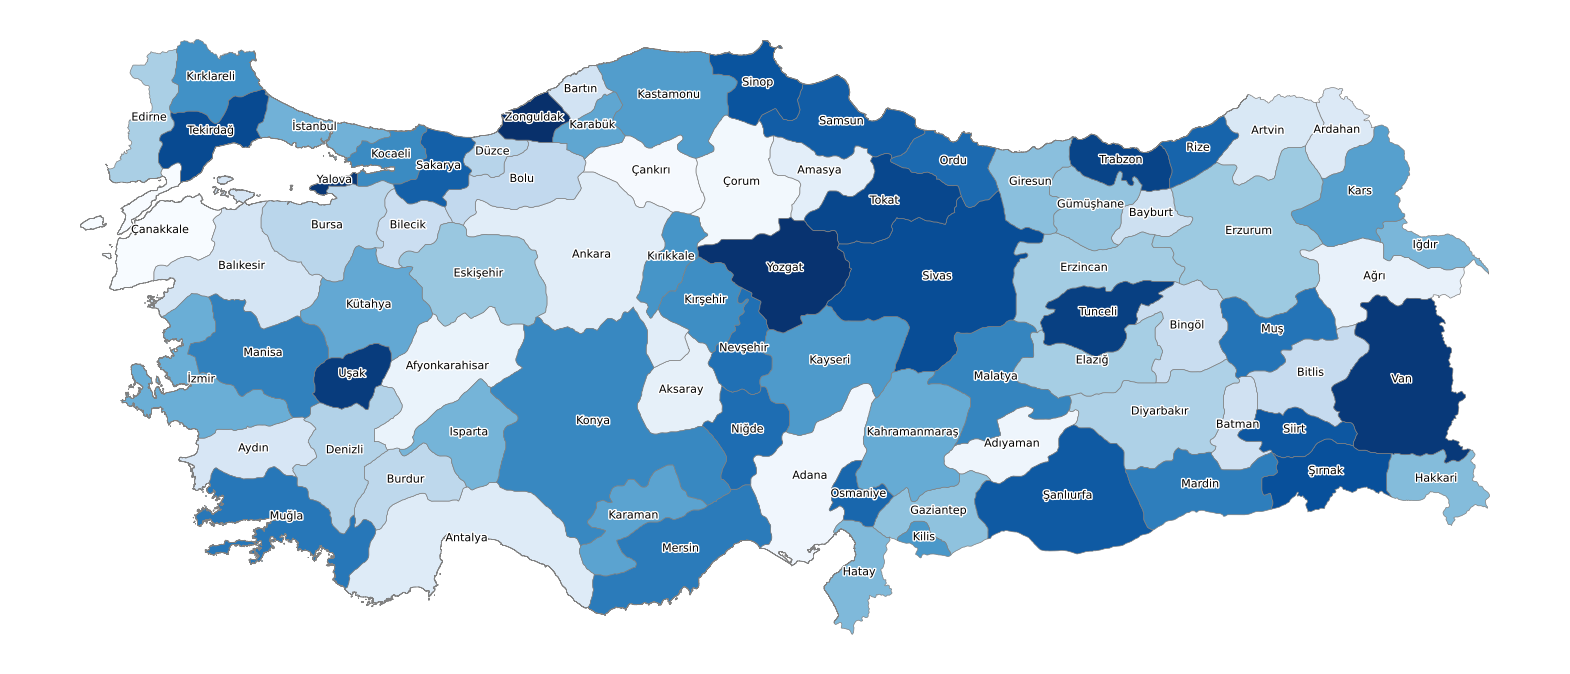

In [60]:
plot_map(gdf)

# Show quotas and enrollments per city

In [29]:
df_quota = pd.read_csv("df_quota.csv",index_col=[0,1])
df_quota.columns = df_quota.columns.astype(int)
df_quota.head(2)

1065  1104  1002  1004  1126  1005  \
Acil Yardım ve Afet Yönetimi quota         NaN   NaN   NaN   NaN   NaN   NaN   
                             enrollments   NaN   NaN   NaN   NaN   NaN   NaN   

                                          1007  1008  1105  1009  ...  3004  \
Acil Yardım ve Afet Yönetimi quota         NaN  64.0   NaN   NaN  ...   NaN   
                             enrollments   NaN  64.0   NaN   NaN  ...   NaN   

                                          3005  4011  4013  4017  4020  4039  \
Acil Yardım ve Afet Yönetimi quota         NaN   NaN   NaN   NaN   NaN   NaN   
                             enrollments   NaN   NaN   NaN   NaN   NaN   NaN   

                                          4052  4096  4088  
Acil Yardım ve Afet Yönetimi quota         NaN   NaN   NaN  
                             enrollments   NaN   NaN   NaN  

[2 rows x 224 columns]

In [19]:
df_universities = pd.read_csv("df_universities.csv",index_col=0)
df_universities.head(3)

,type,name,city
uni_code,,,
1065,Devlet,ABDULLAH GÜL ÜNİVERSİTESİ,Kayseri
1104,Devlet,ADANA ALPARSLAN TÜRKEŞ BİLİM VE TEKNOLOJİ ÜNİV...,Adana
1002,Devlet,ADIYAMAN ÜNİVERSİTESİ,Adıyaman


In [25]:
df_state_universities =df_universities[ df_universities["type"]=="Devlet"]
df_state_universities.head(3)

,type,name,city
uni_code,,,
1065,Devlet,ABDULLAH GÜL ÜNİVERSİTESİ,Kayseri
1104,Devlet,ADANA ALPARSLAN TÜRKEŞ BİLİM VE TEKNOLOJİ ÜNİV...,Adana
1002,Devlet,ADIYAMAN ÜNİVERSİTESİ,Adıyaman


In [30]:
df_quota_state = df_quota.loc[:,df_state_universities.index.tolist()]
df_quota_state.head(2)

1065  1104  1002  1004  1126  1005  \
Acil Yardım ve Afet Yönetimi quota         NaN   NaN   NaN   NaN   NaN   NaN   
                             enrollments   NaN   NaN   NaN   NaN   NaN   NaN   

                                          1007  1008  1105  1009  ...  1043  \
Acil Yardım ve Afet Yönetimi quota         NaN  64.0   NaN   NaN  ...  42.0   
                             enrollments   NaN  64.0   NaN   NaN  ...  42.0   

                                          1121  1094  1096  1098  1102  1099  \
Acil Yardım ve Afet Yönetimi quota        32.0  27.0   NaN   NaN   NaN   NaN   
                             enrollments  32.0  27.0   NaN   NaN   NaN   NaN   

                                          1101  1023  1103  
Acil Yardım ve Afet Yönetimi quota         NaN   NaN   NaN  
                             enrollments   NaN   NaN   NaN  

[2 rows x 126 columns]

In [33]:
df_quota_state.columns = df_state_universities.loc[df_quota_state.columns]["city"]
df_quota_state.head(2)

city                                      Kayseri  Adana  Adıyaman  \
Acil Yardım ve Afet Yönetimi quota            NaN    NaN       NaN   
                             enrollments      NaN    NaN       NaN   

city                                      Afyonkarahisar  Afyonkarahisar  \
Acil Yardım ve Afet Yönetimi quota                   NaN             NaN   
                             enrollments             NaN             NaN   

city                                      Ağrı  Antalya  Aksaray  Antalya  \
Acil Yardım ve Afet Yönetimi quota         NaN      NaN     64.0      NaN   
                             enrollments   NaN      NaN     64.0      NaN   

city                                      Amasya  ...  Tokat  Trabzon  Edirne  \
Acil Yardım ve Afet Yönetimi quota           NaN  ...   42.0     32.0    27.0   
                             enrollments     NaN  ...   42.0     32.0    27.0   

city                                      İstanbul  Uşak  Van  Yalova  \
Acil Yardım ve Afet Yönetimi quota             NaN   NaN  NaN     NaN   
                             enrollments       NaN   NaN  NaN     NaN   

city                                      İstanbul  Yozgat  Zonguldak  
Acil Yardım ve Afet Yönetimi quota             NaN     NaN        NaN  
                             enrollments       NaN     NaN        NaN  

[2 rows x 126 columns]

In [52]:
df_quota_state["Mersin"].sum()

city
Mersin    7274.0
Mersin    1568.0
dtype: float64

In [36]:
df_quota_state.groupby(level=[1]).sum()

city,Kayseri,Adana,Adıyaman,Afyonkarahisar,Afyonkarahisar,Ağrı,Antalya,Aksaray,Antalya,Amasya,...,Tokat,Trabzon,Edirne,İstanbul,Uşak,Van,Yalova,İstanbul,Yozgat,Zonguldak
enrollments,814.0,1199.0,1395.0,3466.0,896.0,1856.0,6317.0,2172.0,1846.0,1642.0,...,2976.0,1431.0,4284.0,442.0,3481.0,3004.0,1802.0,4265.0,2451.0,3367.0
quota,820.0,1350.0,1509.0,3596.0,904.0,1889.0,6389.0,2233.0,1880.0,1679.0,...,3107.0,1431.0,4361.0,449.0,3560.0,3081.0,1820.0,4282.0,2556.0,3462.0


In [39]:
df_result = df_quota_state.groupby(level=[1]).sum().T
df_result.head(2)

,enrollments,quota
city,,
Kayseri,814.0,820.0
Adana,1199.0,1350.0


In [40]:
df_result.shape

(126, 2)

Some cities have several universities. Hence, we will merge again, but this time by city. We will have 81 rows (cities).

In [54]:
df_result =df_result.groupby("city").sum()
print("df_result.shape",df_result.shape) # There are 81 cities in Turkey
df_result.head(2)

df_result.shape (81, 2)


,enrollments,quota
city,,
Adana,6924.0,7222.0
Adıyaman,1395.0,1509.0


In [43]:
gdf = gdf.merge(df_result, how="left", on="city")
gdf.head(3)

,city,geometry,enrollments,quota
0,Çanakkale,"MULTIPOLYGON (((26.05347 39.84736, 26.05347 39...",5260.0,5346.0
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684...",2320.0,2436.0
2,Çorum,"POLYGON ((34.81906 41.20172, 34.84486 41.19581...",1400.0,1431.0


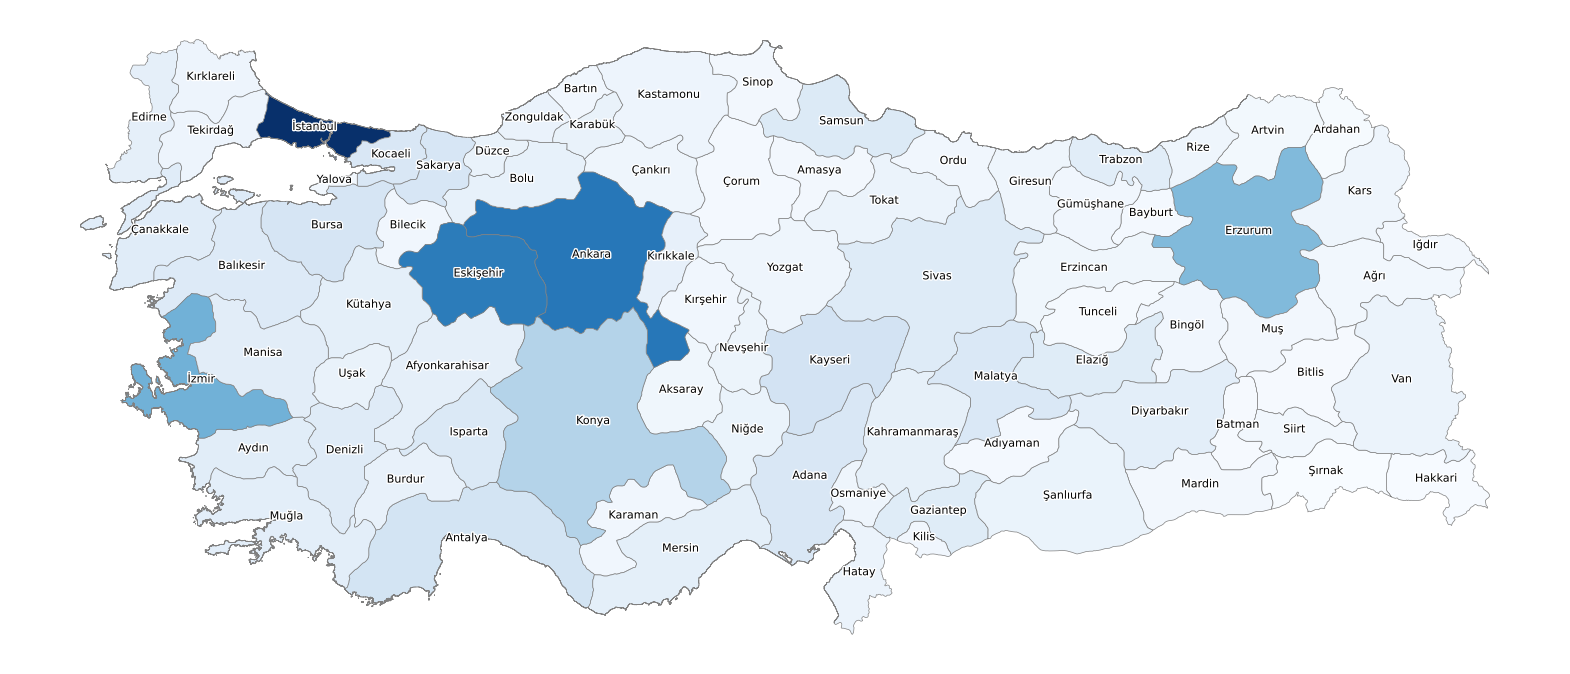

In [44]:
plot_map(gdf,col="enrollments")

In [46]:
pd.set_option('display.max_rows', 500)
df_result

,enrollments,quota
city,,
Adana,6924.0,7222.0
Adıyaman,1395.0,1509.0
Afyonkarahisar,4362.0,4500.0
Aksaray,2172.0,2233.0
Amasya,1642.0,1679.0
Ankara,31020.0,31272.0
Antalya,8163.0,8269.0
Ardahan,792.0,835.0
Artvin,1439.0,1504.0


In [13]:
# !pip install geopy
from geopy.geocoders import Photon

In [37]:
from geopy.geocoders import Nominatim

def get_coordinates(address):
    geolocator = Photon(user_agent="geoapiExercises")
    location = geolocator.geocode(address)
    if location:
        return location.latitude, location.longitude
    else:
        return None, None

# Example usage:
address = "Abdullah Gül Üniversitesi, Sümer Kampüsü, Erkilet Bulvarı, 38080, Kocasinan, Kayseri, Türkiye"
latitude, longitude = get_coordinates(address)
print("Latitude:", latitude)
print("Longitude:", longitude)

Latitude: 38.7390381
Longitude: 35.47447302541963


In [148]:
gdf["geometry"]= gdf.to_crs('+proj=cea').centroid.to_crs(gdf.crs)


In [165]:
gdf

,city,geometry
0,Çanakkale,"MULTIPOLYGON (((27.28653 40.47514, 27.28653 40..."
1,Çankırı,"POLYGON ((33.78607 40.96249, 33.78677 40.95684..."
2,Çorum,"POLYGON ((34.81906 41.20172, 34.81906 41.20172..."
3,Adana,"MULTIPOLYGON (((36.32964 37.92001, 36.32964 37..."
4,Adıyaman,"POLYGON ((38.65534 38.09172, 38.66739 38.09160..."
...,...,...
76,Uşak,"POLYGON ((29.89273 38.77788, 29.89273 38.77788..."
77,Van,"POLYGON ((43.34184 39.39789, 43.34184 39.39789..."
78,Yalova,"POLYGON ((29.39486 40.70208, 29.39486 40.70208..."
79,Yozgat,"POLYGON ((35.34320 40.21666, 35.35103 40.20958..."


In [163]:
gdf.crs = "epsg:4326" #identical to df2 = df2.set_crs('epsg:4326')
gdf = gdf.to_crs(crs=3857) 
gdf.geometry = gdf.buffer(0.001)
gdf = gdf.to_crs(crs=4326) 

In [158]:
gdf.to_crs(epsg=3395)

,city,geometry
0,Çanakkale,POINT (2977860.224 4846427.146)
1,Çankırı,POINT (3721032.862 4938714.629)
2,Çorum,POINT (3858564.332 4920425.480)
3,Adana,POINT (3962216.440 4477115.573)
4,Adıyaman,POINT (4267400.926 4525522.219)
...,...,...
76,Uşak,POINT (3268494.847 4628589.961)
77,Van,POINT (4857784.195 4619665.401)
78,Yalova,POINT (3241358.165 4923569.699)
79,Yozgat,POINT (3924250.123 4789483.737)


In [157]:
gdf.to_crs(2193)

,city,geometry
0,Çanakkale,POINT (-1299368.938 24975323.173)
1,Çankırı,POINT (-1837264.597 24622937.030)
2,Çorum,POINT (-1950026.925 24577361.820)
3,Adana,POINT (-2232228.630 24881625.908)
4,Adıyaman,POINT (-2458370.030 24694811.386)
...,...,...
76,Uşak,POINT (-1605693.654 25045300.224)
77,Van,POINT (-2878506.335 24294955.213)
78,Yalova,POINT (-1476090.746 24823514.222)
79,Yozgat,POINT (-2059203.680 24648924.033)


In [152]:
gdf["geometry"]

0     POINT (26.75057 40.05494)
1     POINT (33.42661 40.68901)
2     POINT (34.66207 40.56383)
3     POINT (35.59320 37.45775)
4     POINT (38.33471 37.80359)
                ...            
76    POINT (29.36139 38.53452)
77    POINT (43.63822 38.47152)
78    POINT (29.11762 40.58537)
79    POINT (35.25214 39.66071)
80    POINT (31.84002 41.25170)
Name: geometry, Length: 81, dtype: geometry